# Time Series Analysis

First, we will use auto_arima in order to identify the optimal values for p,d,q with minimum AIC.

In [1]:
# Import necessary packages and files

from pmdarima.arima import auto_arima
import pandas as pd
import matplotlib.pyplot as plt
import datetime
df = pd.read_csv("Processed Data.csv",sep ='\t')
sent_df = pd.read_csv("Sentiment Polarity Data.csv",sep='\t') 

In [2]:
df.sample(3)  # Sample Data

,date,time,username,to,replies,retweets,favorites,text,mentions,hashtags,id,permalink,processed_text
455622,2020-05-25,08:10:34,rjagadishy,TimesNow,0,0,0,As if #coronavirus knows he is a top leader......,NaN,#coronavirus,1264831208367800321,https://twitter.com/rjagadishy/status/12648312...,coronavirus know top leader dm initiated actio...
407427,2020-05-15,08:36:21,sram_ji,IndiaToday,0,0,0,"Will anyone in media question this, If Corona ...",@rahulkanwal @svaradarajan @paranjoygt @atti_c...,NaN,1261213820183142400,https://twitter.com/sram_ji/status/12612138201...,anyone medium question corona get spread mediu...
16179,2020-03-26,09:31:06,TorchitLtd,NaN,0,2,4,We are all in this together so let the #care &...,NaN,#care #support #healthcare #inclusion #COVID #...,1243108204718051328,https://twitter.com/TorchitLtd/status/12431082...,together let care support available everyone h...


In [3]:
sent_df.sample(3) # Sample Data

,id,processed_text,sentiment,sentiment_score,subjectivity_score
30958,1243552924711579648,quarantine share picture mine view youtube tho...,Neutral,0.000000,0.125000
387608,1259866606408273920,secret happiness freedom secret freedom courag...,Positive,0.107273,0.530909
109025,1246324432198459394,break norm lockdown misbehave voting power mus...,Neutral,0.000000,0.000000


In [4]:
# Select only required data

df = df.iloc[:,0:1]
df = sent_df.join(df)
df = df.drop(['subjectivity_score','sentiment_score','processed_text','id'],axis=1)
df

,sentiment,date
0,Negative,2020-03-25
1,Neutral,2020-03-25
2,Negative,2020-03-25
3,Positive,2020-03-25
4,Positive,2020-03-25
...,...,...
582685,Neutral,2020-06-14
582686,Neutral,2020-06-14
582687,Positive,2020-06-14
582688,Positive,2020-06-14


In [5]:
result = df.groupby(['date', 'sentiment']).size().unstack(fill_value=0)  # Group the data and split it into different columns
result = result.transform(lambda x: round(x/sum(x),4)*100,axis=1)  #Find the percentage values for better plotting
result

sentiment,Negative,Neutral,Positive
date,,,
2020-03-25,18.18,35.74,46.08
2020-03-26,19.03,36.42,44.55
2020-03-27,19.03,35.44,45.52
2020-03-28,21.31,34.75,43.94
2020-03-29,20.83,34.94,44.23
...,...,...,...
2020-06-10,23.60,31.51,44.89
2020-06-11,21.86,35.68,42.46
2020-06-12,20.27,37.98,41.75


The change in the percentage of sentiments with respect to each day is really helpful in predicting the future sentiments. We can take the sentiments from March 25 to May 31 (Lockdown 1 to 4) and predict the sentiments of people from June 1 to 14 (If the lockdown was extended).<br /> <br />
The predicted values can be compared with the actual sentiments of people. The actual sentiments of the people was when the lockdown was not extended (Unlock 1.0).

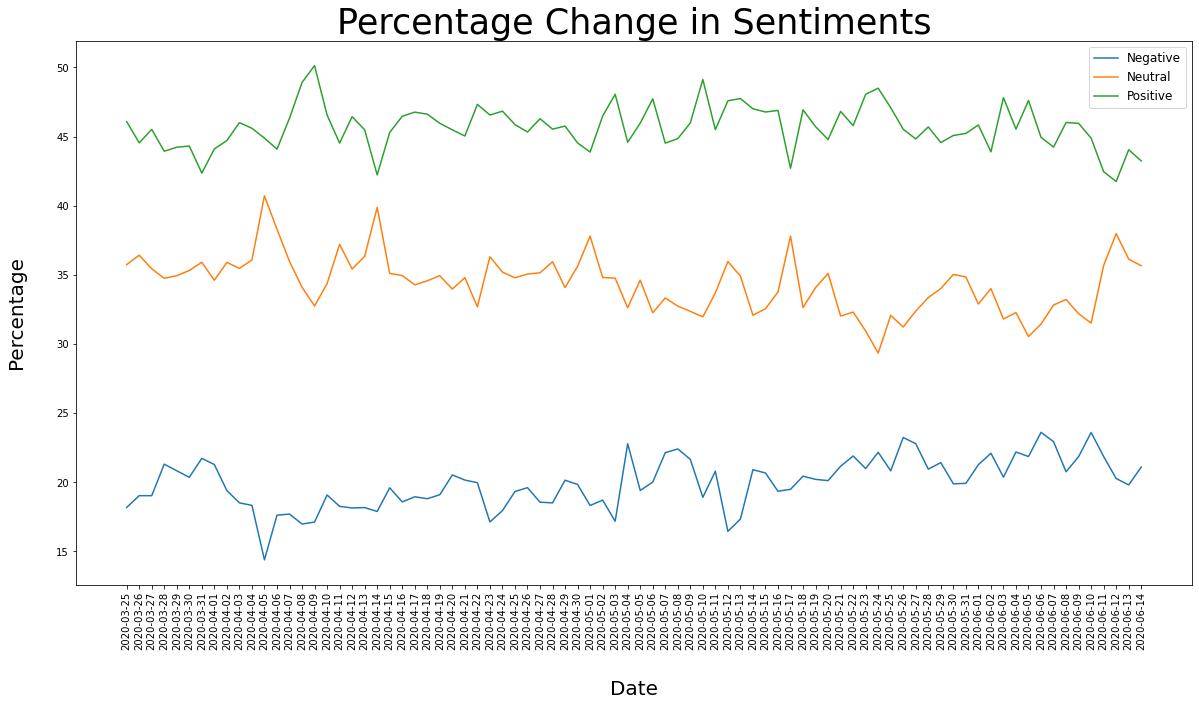

In [6]:
# Plot the data

plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
plt.plot(result)
plt.title("Percentage Change in Sentiments",fontsize=35)
plt.xlabel("Date",fontsize=20,labelpad=30)
plt.ylabel("Percentage",fontsize=20,labelpad=30)
plt.legend(labels=result.columns,fontsize=12)

Here we can see that people has a positive outlook towards lockdown. <br/>

We can see that Positive tweets are averaged at 45%, Neutral tweets at 35% and Negative tweets are at 20%.

In [7]:
train = result.iloc[:68]

In [8]:
# First use auto_arima to find the ARIMA parameters for positive sentiments.

model = auto_arima(train.Positive, start_p=1, start_q=1,
                           max_p=10, max_q=10, m=7,
                           seasonal=True,stepwise=False,
                           approximations=False,
                           trace=True, d=1,
                           error_action='ignore',  
                           suppress_warnings=True)


Fit ARIMA(0,1,0)x(0,0,0,7) [intercept=True]; AIC=269.082, BIC=273.492, Time=0.007 seconds
Fit ARIMA(0,1,0)x(0,0,1,7) [intercept=True]; AIC=271.057, BIC=277.671, Time=0.025 seconds
Fit ARIMA(0,1,0)x(0,0,2,7) [intercept=True]; AIC=272.878, BIC=281.697, Time=0.062 seconds
Fit ARIMA(0,1,0)x(1,0,0,7) [intercept=True]; AIC=271.060, BIC=277.674, Time=0.020 seconds
Fit ARIMA(0,1,0)x(1,0,1,7) [intercept=True]; AIC=273.028, BIC=281.846, Time=0.102 seconds
Fit ARIMA(0,1,0)x(1,0,2,7) [intercept=True]; AIC=274.753, BIC=285.776, Time=0.174 seconds
Fit ARIMA(0,1,0)x(2,0,0,7) [intercept=True]; AIC=272.859, BIC=281.678, Time=0.048 seconds
Fit ARIMA(0,1,0)x(2,0,1,7) [intercept=True]; AIC=274.706, BIC=285.729, Time=0.103 seconds
Fit ARIMA(0,1,0)x(2,0,2,7) [intercept=True]; AIC=275.984, BIC=289.213, Time=0.376 seconds
Fit ARIMA(0,1,1)x(0,0,0,7) [intercept=True]; AIC=251.979, BIC=258.593, Time=0.085 seconds
Fit ARIMA(0,1,1)x(0,0,1,7) [intercept=True]; AIC=253.052, BIC=261.871, Time=0.185 seconds
Fit ARIMA(

Fit ARIMA(4,1,0)x(0,0,1,7) [intercept=True]; AIC=262.479, BIC=277.912, Time=0.067 seconds
Fit ARIMA(4,1,0)x(1,0,0,7) [intercept=True]; AIC=262.474, BIC=277.906, Time=0.078 seconds
Fit ARIMA(4,1,1)x(0,0,0,7) [intercept=True]; AIC=252.109, BIC=267.542, Time=0.264 seconds
Fit ARIMA(5,1,0)x(0,0,0,7) [intercept=True]; AIC=261.358, BIC=276.791, Time=0.067 seconds
Total fit time: 21.196 seconds


In [9]:
print("AIC of model is",model.aic())

AIC of model is 246.83923814626897


In [10]:
train  #Training Data

sentiment,Negative,Neutral,Positive
date,,,
2020-03-25,18.18,35.74,46.08
2020-03-26,19.03,36.42,44.55
2020-03-27,19.03,35.44,45.52
2020-03-28,21.31,34.75,43.94
2020-03-29,20.83,34.94,44.23
...,...,...,...
2020-05-27,22.79,32.38,44.83
2020-05-28,20.95,33.36,45.70
2020-05-29,21.42,34.01,44.57


In [11]:
model.fit(train.Positive)  #Fit the positive data

ARIMA(order=(0, 1, 2), seasonal_order=(0, 0, 0, 7), suppress_warnings=True)

In [12]:
forecast = model.predict(n_periods=14) # Forecast for next 14 days.

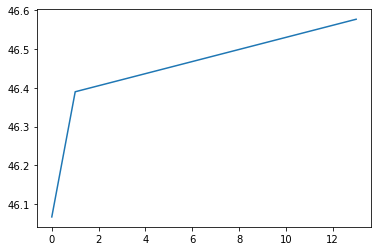

In [13]:
plt.plot(pd.DataFrame(forecast)) #Plot the data

The model has captured an increasing trend for positive tweets.

Since the model was trained with the data during the lockdown days, it predicts the trend of tweets if the lockdown was to continue.

In [14]:
start = datetime.datetime(2020, 6, 1)
end = datetime.datetime(2020, 6, 14)

delta = end - start
test_dates = []
for i in range(delta.days + 1):
    test_dates.append(str(start + datetime.timedelta(days=i)).split()[0])

test_dates 

['2020-06-01',
 '2020-06-02',
 '2020-06-03',
 '2020-06-04',
 '2020-06-05',
 '2020-06-06',
 '2020-06-07',
 '2020-06-08',
 '2020-06-09',
 '2020-06-10',
 '2020-06-11',
 '2020-06-12',
 '2020-06-13',
 '2020-06-14']

In [15]:
predicted_data = pd.DataFrame(forecast,index=test_dates,columns=['Positive'])
predicted_data  

,Positive
2020-06-01,46.067149
2020-06-02,46.390019
2020-06-03,46.405608
2020-06-04,46.421197
2020-06-05,46.436786
2020-06-06,46.452375
2020-06-07,46.467964
2020-06-08,46.483553
2020-06-09,46.499142
2020-06-10,46.514731


Repeat the same process for neutral and negative tweets

In [16]:
model = auto_arima(train.Neutral, start_p=1, start_q=1,
                           max_p=10, max_q=10,m=7,
                           seasonal=True,stepwise=False,
                           approximations=False,
                           trace=True, d=1,
                           error_action='ignore',  
                           suppress_warnings=True)

Fit ARIMA(0,1,0)x(0,0,0,7) [intercept=True]; AIC=280.493, BIC=284.902, Time=0.008 seconds
Fit ARIMA(0,1,0)x(0,0,1,7) [intercept=True]; AIC=282.447, BIC=289.061, Time=0.033 seconds
Fit ARIMA(0,1,0)x(0,0,2,7) [intercept=True]; AIC=283.246, BIC=292.065, Time=0.070 seconds
Fit ARIMA(0,1,0)x(1,0,0,7) [intercept=True]; AIC=282.435, BIC=289.050, Time=0.028 seconds
Fit ARIMA(0,1,0)x(1,0,1,7) [intercept=True]; AIC=282.301, BIC=291.120, Time=0.239 seconds
Fit ARIMA(0,1,0)x(1,0,2,7) [intercept=True]; AIC=285.246, BIC=296.269, Time=0.136 seconds
Fit ARIMA(0,1,0)x(2,0,0,7) [intercept=True]; AIC=283.119, BIC=291.938, Time=0.067 seconds
Fit ARIMA(0,1,0)x(2,0,1,7) [intercept=True]; AIC=283.668, BIC=294.692, Time=0.562 seconds
Fit ARIMA(0,1,0)x(2,0,2,7) [intercept=True]; AIC=285.423, BIC=298.651, Time=0.381 seconds
Fit ARIMA(0,1,1)x(0,0,0,7) [intercept=True]; AIC=270.825, BIC=277.439, Time=0.025 seconds
Fit ARIMA(0,1,1)x(0,0,1,7) [intercept=True]; AIC=268.284, BIC=277.103, Time=0.145 seconds
Fit ARIMA(

Fit ARIMA(4,1,1)x(0,0,0,7) [intercept=True]; AIC=265.784, BIC=281.217, Time=0.312 seconds
Fit ARIMA(5,1,0)x(0,0,0,7) [intercept=True]; AIC=276.635, BIC=292.068, Time=0.051 seconds
Total fit time: 23.253 seconds


In [17]:
print("AIC of model is",model.aic())

AIC of model is 261.7710709409829


In [18]:
model.fit(train.Neutral)

ARIMA(order=(1, 1, 1), seasonal_order=(0, 0, 0, 7), suppress_warnings=True)

In [19]:
forecast = model.predict(n_periods=14) # Forecast for next 14 days.

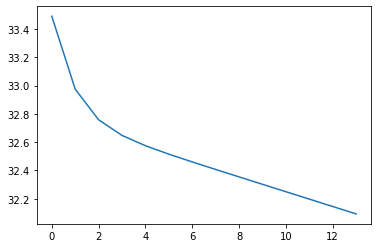

In [20]:
plt.plot(pd.DataFrame(forecast)) #Plot the data

Neutral tweets have a decreasing trend.

In [21]:
predicted_data['Neutral'] = forecast

In [22]:
model = auto_arima(train.Negative, start_p=1, start_q=1,
                           max_p=10, max_q=10, m=7,
                           seasonal=True, stepwise=False,
                           approximations=False,
                           trace=True, d=1,
                           error_action='ignore',  
                           suppress_warnings=True)

Fit ARIMA(0,1,0)x(0,0,0,7) [intercept=True]; AIC=261.137, BIC=265.546, Time=0.005 seconds
Fit ARIMA(0,1,0)x(0,0,1,7) [intercept=True]; AIC=260.357, BIC=266.971, Time=0.028 seconds
Fit ARIMA(0,1,0)x(0,0,2,7) [intercept=True]; AIC=262.037, BIC=270.856, Time=0.057 seconds
Fit ARIMA(0,1,0)x(1,0,0,7) [intercept=True]; AIC=260.484, BIC=267.098, Time=0.026 seconds
Fit ARIMA(0,1,0)x(1,0,1,7) [intercept=True]; AIC=262.303, BIC=271.122, Time=0.062 seconds
Fit ARIMA(0,1,0)x(1,0,2,7) [intercept=True]; AIC=258.041, BIC=269.065, Time=0.190 seconds
Fit ARIMA(0,1,0)x(2,0,0,7) [intercept=True]; AIC=261.786, BIC=270.605, Time=0.072 seconds
Fit ARIMA(0,1,0)x(2,0,1,7) [intercept=True]; AIC=262.912, BIC=273.935, Time=0.171 seconds
Fit ARIMA(0,1,0)x(2,0,2,7) [intercept=True]; AIC=255.203, BIC=268.431, Time=0.414 seconds
Fit ARIMA(0,1,1)x(0,0,0,7) [intercept=True]; AIC=249.338, BIC=255.952, Time=0.025 seconds
Fit ARIMA(0,1,1)x(0,0,1,7) [intercept=True]; AIC=251.297, BIC=260.116, Time=0.039 seconds
Fit ARIMA(

Fit ARIMA(4,1,1)x(0,0,0,7) [intercept=True]; AIC=250.138, BIC=265.571, Time=0.229 seconds
Fit ARIMA(5,1,0)x(0,0,0,7) [intercept=True]; AIC=257.472, BIC=272.905, Time=0.037 seconds
Total fit time: 24.750 seconds


In [23]:
print("AIC of model is",model.aic())

AIC of model is 245.71411371299874


In [24]:
model.fit(train.Negative)  #Fit the positive data

ARIMA(order=(1, 1, 1), seasonal_order=(0, 0, 0, 7), suppress_warnings=True)

In [25]:
forecast = model.predict(n_periods=14) # Forecast for next 14 days.

In [26]:
predicted_data['Negative'] = forecast

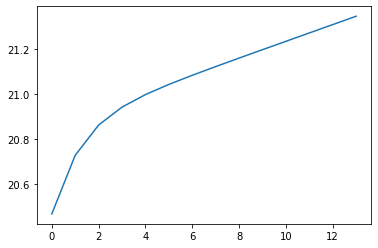

In [27]:
plt.plot(pd.DataFrame(forecast)) #Plot the data

Negative tweets have an increasing trend.

In [28]:
predicted_data

,Positive,Neutral,Negative
2020-06-01,46.067149,33.490210,20.467956
2020-06-02,46.390019,32.974442,20.727892
2020-06-03,46.405608,32.757848,20.862167
2020-06-04,46.421197,32.647299,20.941617
2020-06-05,46.436786,32.574339,20.997147
2020-06-06,46.452375,32.514703,21.042241
2020-06-07,46.467964,32.459789,21.082782
2020-06-08,46.483553,32.406550,21.121336
2020-06-09,46.499142,32.353904,21.159023
2020-06-10,46.514731,32.301469,21.196333


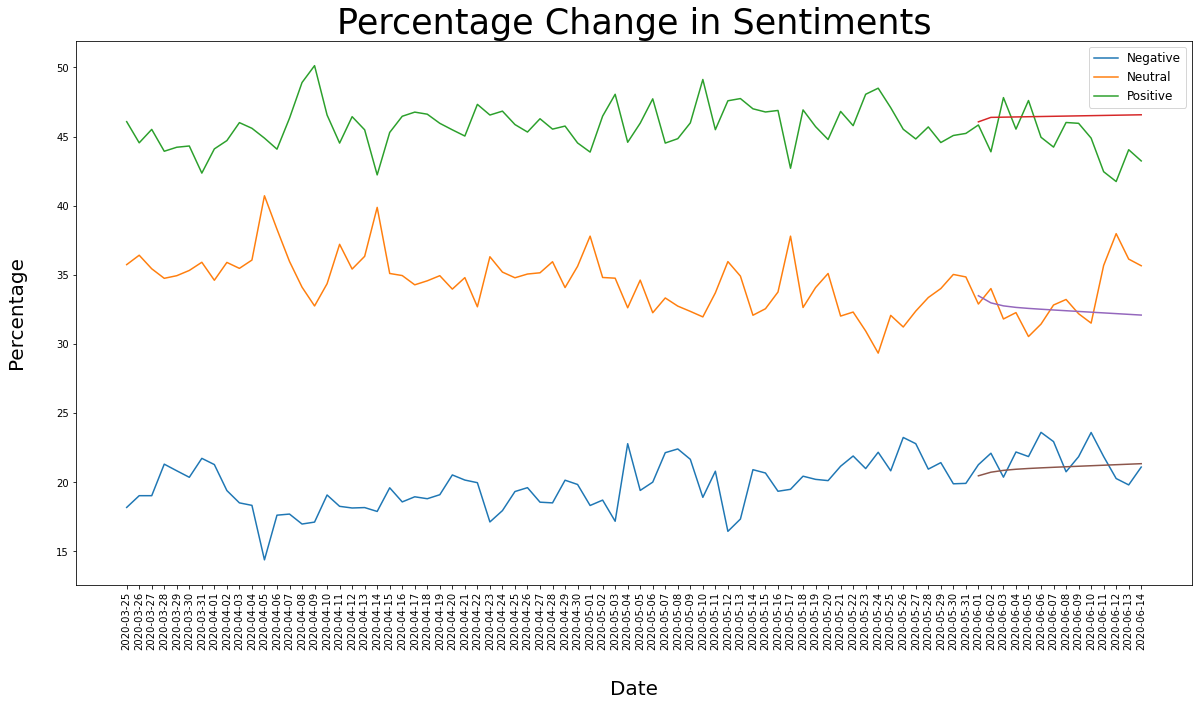

In [29]:
#Plot the data

plt.figure(figsize=(20,10))
plt.plot(result)
plt.plot(predicted_data)
plt.xticks(rotation=90)
plt.title("Percentage Change in Sentiments",fontsize=35)
plt.xlabel("Date",fontsize=20,labelpad=30)
plt.ylabel("Percentage",fontsize=20,labelpad=30)
plt.legend(labels=result.columns,fontsize=12)

The above visualisation shows the sentiments of people. The second line with respect to each line graph shows the predicted sentiments of people if lockdown was extended.

We can see that if the lockdown was extended:
<ul><li>The amount of positive tweets started to increase.</li>
    <li>The amount of neutral tweets started to decrease.</li>
    <li>The amount of negative tweets stayed increase.</li></ul>

So people have a mixed outlook towards the extension of lockdown(Some are happy, some are sad).

In [30]:
# Save the data

predicted_data.to_csv("Time Series Prediction.csv")